In [18]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rc("font", family="Times New Roman", size=16)

In [31]:
dom = [-30., -10., 20., 35.]

In [12]:
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

In [39]:
myproj = ccrs.UTM(28, southern_hemisphere=False, globe=None)

In [47]:
datafile = "/home/ctroupin/data/Precip/3B-DAY-E.MS.MRG.3IMERG.20220925-S000000-E235959.V06.nc4"
with netCDF4.Dataset(datafile) as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    goodlon = np.where((lon<=dom[1]) & (lon>=dom[0]))[0]
    goodlat = np.where((lat<=dom[3]) & (lat>=dom[2]))[0]
    prec = nc.variables["HQprecipitation"][0,goodlon,goodlat]
    lat = lat[goodlat]
    lon = lon[goodlon]

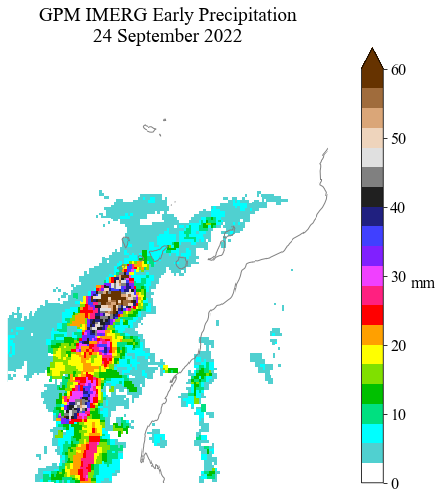

In [45]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=myproj)
ax.set_extent(dom)
ax.set_title("GPM IMERG Early Precipitation\n24 September 2022")
plt.pcolormesh(lon, lat, prec.T, cmap=cmap, transform=ccrs.PlateCarree(), vmin=0, vmax=60., zorder=2)
cb = plt.colorbar(extend="max")
cb.set_label("mm", ha="left", rotation=0)
ax.spines['geo'].set_color("w")
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms', layers=['coastlines'], zorder=3)
plt.savefig("precip20220924.png", dpi=300, bbox_inches="tight")

In [48]:
prec.max()

62.064995